<a href="https://colab.research.google.com/github/reignerlastimosa/fraud_detection/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries
import pandas as pd
import numpy as nm
from matplotlib import pyplot as mtp

In [ ]:
#Importing the data
dataset = pd.read_csv('fraud.csv')
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
dataset.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
#Extracting Independent and dependent Variable  
x= dataset.iloc[:, [2,4,5,7,8]].values  
y= dataset.iloc[:, 9].values  
x

array([[9.83964000e+03, 1.70136000e+05, 1.60296360e+05, 0.00000000e+00,
        0.00000000e+00],
       [1.86428000e+03, 2.12490000e+04, 1.93847200e+04, 0.00000000e+00,
        0.00000000e+00],
       [1.81000000e+02, 1.81000000e+02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       ...,
       [6.31140928e+06, 6.31140928e+06, 0.00000000e+00, 6.84888400e+04,
        6.37989811e+06],
       [8.50002520e+05, 8.50002520e+05, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [8.50002520e+05, 8.50002520e+05, 0.00000000e+00, 6.51009911e+06,
        7.36010163e+06]])

In [ ]:
# Splitting the dataset into the Training set and Test set  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)  

In [ ]:
# Feature Scaling  
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)  

# Naive Bayes

In [ ]:
# Fitting Naive Bayes to the Training set  
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train, y_train)  

GaussianNB()

In [ ]:
# Predicting the Test set results  
y_pred = classifier.predict(x_test)  

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
# Making the Confusion Matrix  
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)  

In [ ]:
cm

array([[1578712,    9916],
       [   1675,     352]], dtype=int64)

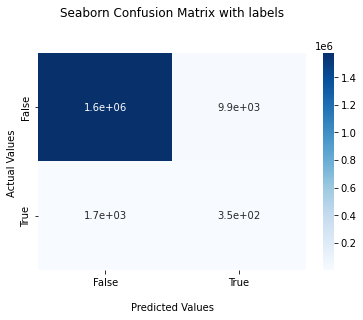

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


print('Accuracy Score:', accuracy_score(y_test,y_pred))
print('Precision Score:',precision_score(y_test,y_pred))
print('Recall Score:',recall_score(y_test,y_pred))
print('F1 Score:',f1_score(y_test,y_pred))

Accuracy Score: 0.9927130647437691
Precision Score: 0.03428126217374367
Recall Score: 0.17365564874198322
F1 Score: 0.05725904839365597


# Decision Tree

In [ ]:
# Fitting Naive Bayes to the Training set  
from sklearn.tree import DecisionTreeClassifier 
classifier = DecisionTreeClassifier()  
classifier.fit(x_train, y_train) 

DecisionTreeClassifier()

In [ ]:
# Predicting the Test set results  
y_pred = classifier.predict(x_test)  

In [ ]:
df = {'Actual Values':y_test, 'Predicted Values':y_pred}
df = pd.DataFrame(data = df)
df

,Actual Values,Predicted Values
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1590650,0,0
1590651,0,0
1590652,0,0
1590653,0,0


In [ ]:
# Making the Confusion Matrix  
from sklearn.metrics import confusion_matrix  
confused = confusion_matrix(y_test, y_pred)  
confused

array([[1588352,     276],
       [    303,    1724]], dtype=int64)

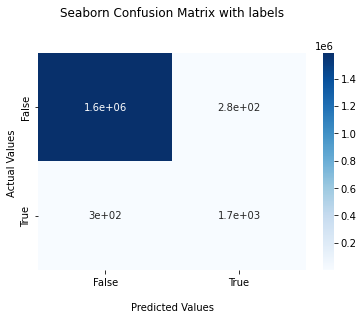

In [ ]:
ax = sns.heatmap(confused, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
print('Accuracy Score:', accuracy_score(y_test,y_pred))
print('Precision Score:',precision_score(y_test,y_pred))
print('Recall Score:',recall_score(y_test,y_pred))
print('F1 Score:',f1_score(y_test,y_pred))

Accuracy Score: 0.9996359990066985
Precision Score: 0.862
Recall Score: 0.8505180069067587
F1 Score: 0.8562205115470573


# SVM

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train)  

SVC(kernel='linear', random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

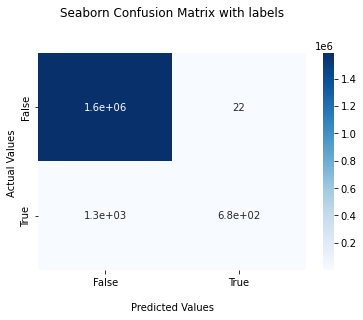

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


print('Accuracy Score:', accuracy_score(y_test,y_pred))
print('Precision Score:',precision_score(y_test,y_pred))
print('Recall Score:',recall_score(y_test,y_pred))
print('F1 Score:',f1_score(y_test,y_pred))

Accuracy Score: 0.9991406055995801
Precision Score: 0.96875
Recall Score: 0.3364578194375925
F1 Score: 0.4994507506407909


In [ ]:
import pandas as pd
accuracy_scores = {'Model': ['Naive Bayes','Decision Tree','SVM'], 'Accuracy Score': [0.9927130647437691,0.9996359990066985,0.9991406055995801],'Precision':[0.9991406055995801,0.862,0.96875],'Recall':[0.17365564874198322,0.8505180069067587,0.3364578194375925],'F1 Score':[0.05725904839365597,0.8562205115470573,0.4994507506407909]}

metrics = pd.DataFrame(data = accuracy_scores)
metrics

,Model,Accuracy Score,Precision,Recall,F1 Score
0,Naive Bayes,0.992713,0.999141,0.173656,0.057259
1,Decision Tree,0.999636,0.862000,0.850518,0.856221
2,SVM,0.999141,0.968750,0.336458,0.499451
